# Data Ingestion

In [2]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

In [3]:
from pyathena import connect

In [4]:
s3_articles_path = "s3://ads508sanjay/Articles"
s3_customers_path = "s3://ads508sanjay/Customers/"
s3_transactions_path = "s3://ads508sanjay/Transactions/"

In [5]:
%store s3_articles_path  
%store s3_customers_path  
%store s3_transactions_path

Stored 's3_articles_path' (str)
Stored 's3_customers_path' (str)
Stored 's3_transactions_path' (str)


### Creating Database

In [6]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

# Set Athena parameters
database_name = "clothingstore"

In [7]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [8]:
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement)

CREATE DATABASE IF NOT EXISTS clothingstore


In [9]:
pd.read_sql(statement, conn)

""


In [10]:
statement = "SHOW DATABASES"

df_show = pd.read_sql(statement, conn)
df_show.head(10)

,database_name
0,clothing
1,clothingstore
2,default
3,project
4,project2
5,project3
6,project4
7,project5
8,test
9,transactions


### Creating Table Customers

In [11]:
table_name = "customers"

In [12]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         customer_id string,
         FN boolean,
         active boolean,
         club_member_status string,
         fashion_news_frequency string,
         age int,
         postal_code string  
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_customers_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.customers(
         customer_id string,
         FN boolean,
         active boolean,
         club_member_status string,
         fashion_news_frequency string,
         age int,
         postal_code string  
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '
'
STORED AS TEXTFILE
LOCATION 's3://ads508sanjay/Customers/'
TBLPROPERTIES ('skip.header.line.count'='1')


In [13]:
import pandas as pd

pd.read_sql(statement, conn)

""


### Verify Tables

In [14]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)


,tab_name
0,articles
1,customers
2,transactions


### Run a sample query

In [15]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.customers


In [16]:
df_customers = pd.read_sql(statement, conn)
df_customers.head(10)



,customer_id,fn,active,club_member_status,fashion_news_frequency,age,postal_code
0,2978aade39de1358d9cf91d0a048a1f6632ddd88e75bc1...,None,None,ACTIVE,NONE,40.0,4c77dcd161f3aa4a00d6bcf9bb7071f1cda3bea4ece301...
1,2978ab60f5806866bdbe09b7c7afb40bdf260386248baf...,None,None,ACTIVE,Regularly,27.0,72ba62829df648894ae699c22b2d5573d0b689d2f203b7...
2,2978ca89627f1b020761006f84367854927adc5859b97f...,None,None,ACTIVE,Regularly,62.0,b311667752a7558f654a7d407a59f39e75ead83efb82f0...
3,2978d5e0ccf916912b929be75fd338055b73c434a863a2...,None,None,ACTIVE,Regularly,39.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
4,2978d89789506fd3d90d1197d2b22d5bedee045c7b7fe0...,None,None,ACTIVE,NONE,51.0,b496fdecbd12aebbe73254c6f5b66b2eb1ac6eaeaadcbd...
5,2978dbdc38dd7ade1153537ca38976c766d2ebefabae54...,None,None,ACTIVE,NONE,24.0,cc8097e0676655cfbcdabf081ccf232d7dac0be7ae5f79...
6,2978de0fed105c5ca9ec6cd7011f7cee4ea7ae6c595950...,None,None,ACTIVE,,72.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
7,2978e65fc3c9951c4669849e6145849581df37362ad166...,None,None,PRE-CREATE,NONE,21.0,15fe66bdebb1dfaeb630b671556ac5048971209a502c8a...
8,2978e892483fe98de2a753f2e134a1dfa072594a81bb7d...,None,None,ACTIVE,NONE,35.0,a5f07c5358e20c129b907f34cbb08aef4618ad11f5ee82...
9,2978ef69c80359cfd29c2e9a021fba3a07419573d787ea...,None,None,ACTIVE,NONE,21.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


### Create Table Articles

In [17]:
table_name = "articles"

In [18]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         article_id string,
         product_code string,
         prod_name string,
         product_type_no string,
         product_type_name string,
         product_group_name string,
         graphical_appearance_no string,
         graphical_appearance_name string,
         colour_group_code string,
         colour_group_name string,
         perceived_colour_value_id string,
         perceived_colour_value_name string,
         perceived_colour_master_id string,
         perceived_colour_master_name string,
         department_no string,
         department_name string,
         index_code string,
         index_name string,
         index_group_no string,
         index_group_name string,
         section_no string,
         section_name string,
         garment_group_no string,
         garment_group_name string,
         detail_desc  string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_articles_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.articles(
         article_id string,
         product_code string,
         prod_name string,
         product_type_no string,
         product_type_name string,
         product_group_name string,
         graphical_appearance_no string,
         graphical_appearance_name string,
         colour_group_code string,
         colour_group_name string,
         perceived_colour_value_id string,
         perceived_colour_value_name string,
         perceived_colour_master_id string,
         perceived_colour_master_name string,
         department_no string,
         department_name string,
         index_code string,
         index_name string,
         index_group_no string,
         index_group_name string,
         section_no string,
         section_name string,
         garment_group_no string,
         garment_group_name string,
         detail_desc  string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES T

In [19]:
import pandas as pd

pd.read_sql(statement, conn)

""


### Show Tables

In [20]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)


,tab_name
0,articles
1,customers
2,transactions


### Run a sample query

In [21]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.articles


In [22]:
df_articles = pd.read_sql(statement, conn)
df_articles.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0707849002,0707849,PQ Isabella Sandal SG,91,Sandals,Shoes,1010016,Solid,12,Light Beige,...,Kids Girl Shoes,J,"""Children Accessories","Swimwear""",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes
1,0707851002,0707851,Sofia dance shoe,89,Other shoe,Shoes,1010009,Glittering/Metallic,12,Light Beige,...,Kids Dress-up/Football,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1019
2,0707852002,0707852,Foil cape,78,Other accessories,Accessories,1010009,Glittering/Metallic,51,Light Pink,...,Kids Dress-up/Football,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1019
3,0707931001,0707931,Columbine SP Andes,306,Bra,Underwear,1010021,Lace,09,Black,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"""Under-","Nightwear"""
4,0707931005,0707931,Columbine SP Andes,306,Bra,Underwear,1010021,Lace,10,White,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"""Under-","Nightwear"""
5,0707983001,0707983,Drums,264,Blazer,Garment Upper body,1010026,Other structure,09,Black,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,"""Jacket in a textured weave with fringe trims"
6,0707983002,0707983,Drums,264,Blazer,Garment Upper body,1010026,Other structure,11,Off White,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,"""Jacket in a textured weave with fringe trims"
7,0707983003,0707983,Drums,264,Blazer,Garment Upper body,1010026,Other structure,42,Red,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,"""Jacket in a textured weave with fringe trims"
8,0707983004,0707983,Drums,264,Blazer,Garment Upper body,1010026,Other structure,09,Black,...,Suit,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1008,Dressed,"""Jacket in a textured weave with fringe trims"
9,0707995011,0707995,DIV Bounty tank,254,Top,Garment Upper body,1010001,All over pattern,09,Black,...,Divided+,D,Divided,2,Divided,50,Divided Projects,1001,Unknown,"""Sleeveless top in a patterned viscose weave w..."


### Create Table Transactions

In [23]:
table_name = "transactions"

In [24]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         t_dat string,
         customer_id string,
         article_id string,
         price int,
         sales_channel_id string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_transactions_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.transactions(
         t_dat string,
         customer_id string,
         article_id string,
         price int,
         sales_channel_id string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '
'
STORED AS TEXTFILE
LOCATION 's3://ads508sanjay/Transactions/'
TBLPROPERTIES ('skip.header.line.count'='1')


In [25]:
import pandas as pd

pd.read_sql(statement, conn)

""


### Show Tables

In [26]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)

,tab_name
0,articles
1,customers
2,transactions


### Run a sample query

In [27]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.transactions


In [28]:
df_transactions = pd.read_sql(statement, conn)
df_transactions.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0,1
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0,2
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0,1
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0,1
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0,2
5,11/26/18,015d296b8be07e904ec2b84cd34627e409597af835f743...,695398001,0,2
6,9/26/18,4d6e809f59b6e592d35c2998535cfed1da27fb29541f14...,535783001,0,2
7,3/28/19,a44899e4112056655eb523f0a1efc7906ca2b82e6a5038...,502224001,0,2
8,6/2/19,15972b176a3ba803af38123bf700b7473565654e6a1762...,708021001,0,2
9,6/16/20,a1124b22110bd68f653c9da56b49f15e608b901cb12a0e...,809961002,0,2


##### Align data types for key fields

In [29]:
df_transactions['customer_id'] = df_transactions['customer_id'].astype(str)

In [30]:
df_transactions['article_id'] = df_transactions['article_id'].astype(str)

In [31]:
df_articles['article_id'] = df_articles['article_id'].astype(str)

In [32]:
df_customers['customer_id'] = df_customers['customer_id'].astype(str)

#### Merging dataframes into one dataframe

In [33]:
df_merge = df_transactions.merge(df_articles,on='article_id', how='left').merge(df_customers,on='customer_id', how='left')
df_merge.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,fn,active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


# Data Exploration

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [35]:
sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 20,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "font.size": 10,
        "ytick.labelsize": 10,
    }
)


In [36]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()), 2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)


### Visualizations

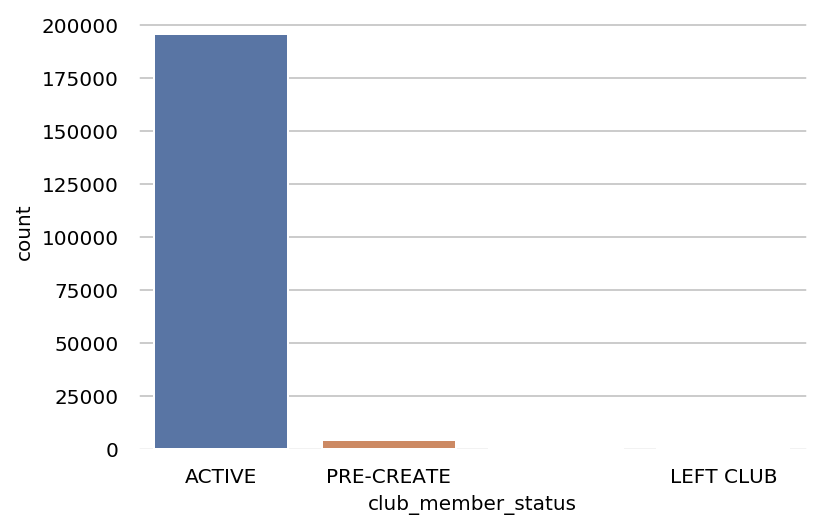

In [41]:
club_member_count_viz = sns.countplot(x="club_member_status", data=df_merge)

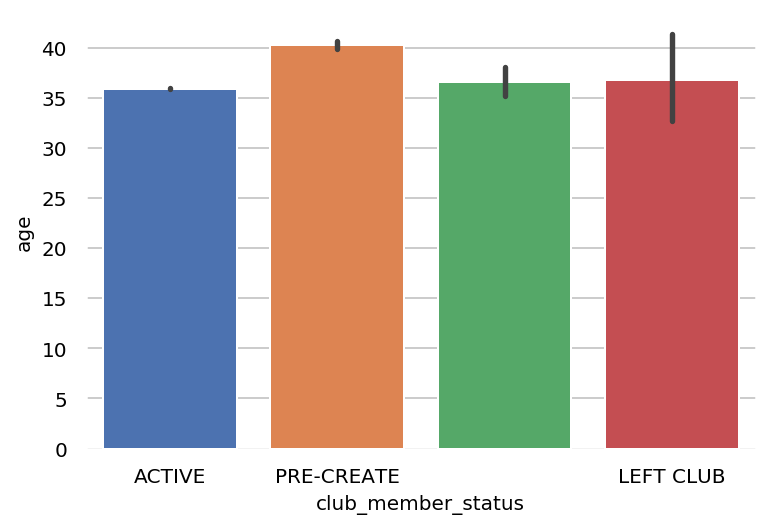

In [42]:
club_member_age_viz =  sns.barplot(y="age", x="club_member_status", data=df_merge, saturation=1)

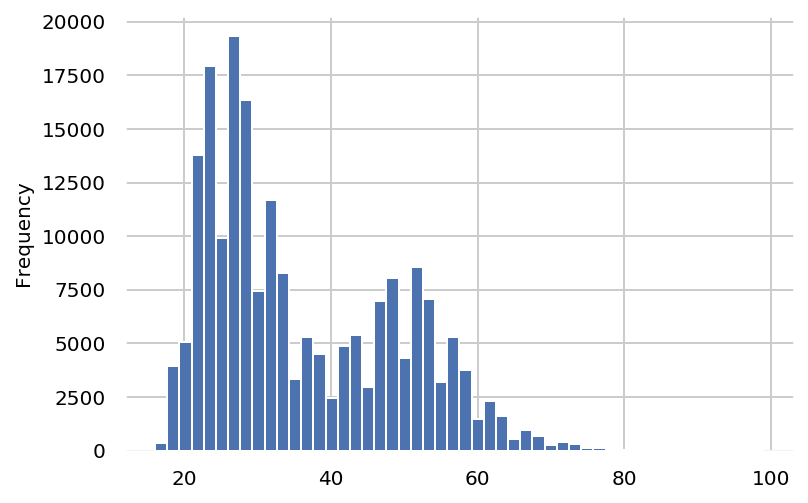

In [43]:
df_merge["age"].plot.hist(bins=50)

#### Rebalance Data

###### Create Bins for int variables

In [44]:
df_merge['AgeBins'] = pd.qcut(df_merge['age'],4)

In [45]:
df_merge['AgeBins'].unique()

[(15.999, 25.0], (31.0, 47.0], (47.0, 99.0], (25.0, 31.0], NaN]
Categories (4, interval[float64]): [(15.999, 25.0] < (25.0, 31.0] < (31.0, 47.0] < (47.0, 99.0]]

###### Balance the data with binned variables

In [48]:
df_grouped_by = df_merge.groupby(["AgeBins", "price"])[["AgeBins", "price"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

(196420, 2)

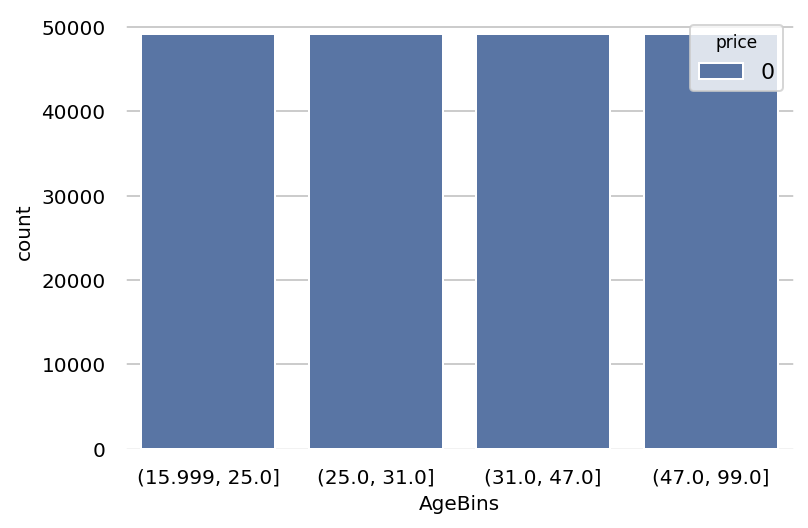

In [49]:
import seaborn as sns

sns.countplot(data=df_balanced, x="AgeBins", hue="price")

CLOSE FILE

In [50]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [ ]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}